# Q2: Multi-Class Classification

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
import math
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import pandas as pd
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


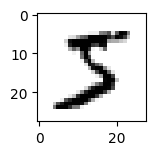

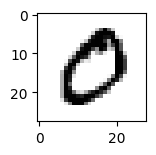

In [ ]:
#Looking at a few digits
for i in range(2):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('binary'))
  pyplot.show()

## Data Manipulation


In [ ]:
#Changing to greyscale between 0,1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Reshaping the observation data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

Note: Only using digits 3, 5, and 8 for computational purposes

In [ ]:
#Isolating subclasses 3, 5, and 8
train_idx = [i for i in range(len(y_train)) if (y_train[i] == 3 or
                                                y_train[i] == 8 or
                                                y_train[i] == 5 )]
test_idx = [i for i in range(len(y_test)) if (y_test[i] == 3
                                              or y_test[i] == 8
                                              or y_test[i] == 5)]

X_train = X_train[train_idx]
y_train = y_train[train_idx]

X_test = X_test[test_idx]
y_test = y_test[test_idx]

In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (17403, 784)
Y_train: (17403,)
X_test:  (2876, 784)
Y_test:  (2876,)


## Multinomial Regression

In [ ]:
# Using libraries
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(multi_class = 'multinomial', max_iter=100)

In [ ]:
C_seq = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=C_seq, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='accuracy')

In [ ]:
best_c = grid_search.best_params_['C']
print(f"Best C Value: {best_c}")

Best C Value: 0.1


In [ ]:
final_clf = LogisticRegression(multi_class = 'multinomial', max_iter=100, C = best_c)
final_clf.fit(X_train,y_train)

LogisticRegression(C=0.1, multi_class='multinomial')

In [ ]:
y_pred = final_clf.predict(X_test)

In [ ]:
multi_matrix = confusion_matrix(y_test, y_pred)
multi_class_accuracies = confusion_matrix(y_test, y_pred, normalize ="true").diagonal()

In [ ]:
multi_matrix

array([[950,  26,  34],
       [ 37, 819,  36],
       [ 25,  28, 921]])

<Axes: >

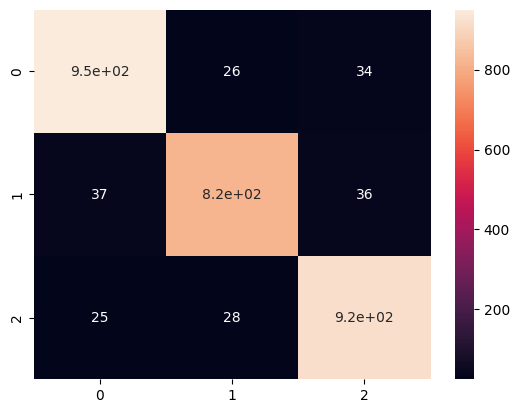

In [ ]:
sns.heatmap(multi_matrix, annot=True)

In [ ]:
multi_class_accuracies

array([0.94059406, 0.91816143, 0.94558522])

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()

In [ ]:
a_seq = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=a_seq, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [ ]:
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha Value: {best_alpha}")


Best Alpha Value: 0.001


In [ ]:
final_clf = MultinomialNB(alpha=best_alpha)
final_clf.fit(X_train, y_train)

MultinomialNB(alpha=0.001)

In [ ]:
y_pred = final_clf.predict(X_test)

In [ ]:
NB_matrix = confusion_matrix(y_test, y_pred)
NB_class_accuracies = confusion_matrix(y_test, y_pred, normalize ="true").diagonal()

In [ ]:
NB_matrix

array([[912,  27,  71],
       [125, 676,  91],
       [ 62,  39, 873]])

<Axes: >

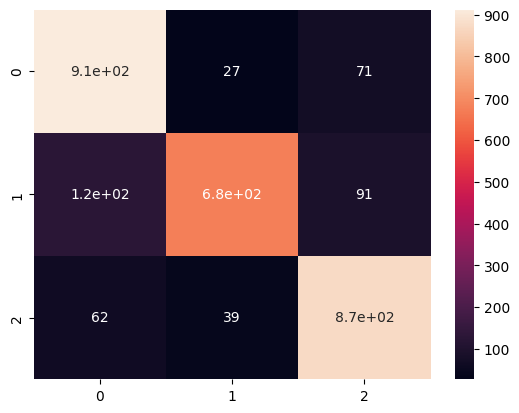

In [ ]:
sns.heatmap(NB_matrix, annot=True)

In [ ]:
NB_class_accuracies

array([0.9029703 , 0.75784753, 0.8963039 ])

## Linear Discriminant Analysis

Note: Since there are two hyperparameters, we look at both solver and shrinkage.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
clf = LinearDiscriminantAnalysis()

In [ ]:
param_grid = {
    'shrinkage': [0, 1, 0.01],
    'solver': ['svd', 'lsqr', 'eigen']
}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0, 1, 0.01],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [ ]:
best_shrinkage = grid_search.best_params_['shrinkage']
best_solver = grid_search.best_params_['solver']
print(f"Best n_components: {best_shrinkage}")
print(f"Best solver: {best_solver}")

Best n_components: 0.01
Best solver: lsqr


In [ ]:
final_clf = LinearDiscriminantAnalysis(shrinkage=best_shrinkage, solver=best_solver)
final_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage=0.01, solver='lsqr')

In [ ]:
y_pred = final_clf.predict(X_test)

In [ ]:
LDA_matrix = confusion_matrix(y_test, y_pred)
LDA_class_accuracies = confusion_matrix(y_test, y_pred, normalize ="true").diagonal()

In [ ]:
LDA_matrix

array([[936,  42,  32],
       [ 34, 821,  37],
       [ 30,  54, 890]])

<Axes: >

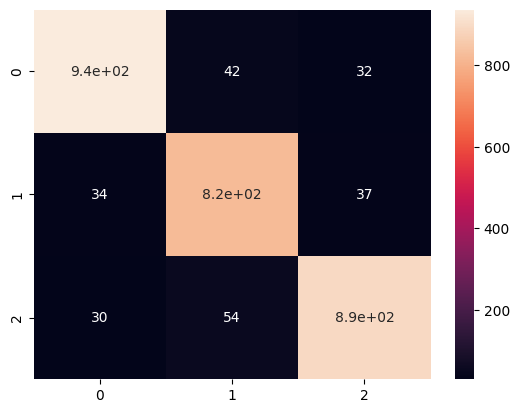

In [ ]:
sns.heatmap(LDA_matrix, annot=True)

In [ ]:
LDA_class_accuracies

array([0.92673267, 0.92040359, 0.9137577 ])

## Linear SVM

In [ ]:
clf = SVC(kernel='linear',decision_function_shape='ovr', max_iter=100)

In [ ]:
C_seq = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=C_seq, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', max_iter=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='accuracy')

In [ ]:
best_c = grid_search.best_params_['C']
print(f"Best C Value: {best_c}")

Best C Value: 0.01


In [ ]:
final_clf = SVC(kernel='linear',decision_function_shape='ovr', max_iter=100, C = best_c)
final_clf.fit(X_train,y_train)

SVC(C=0.01, kernel='linear', max_iter=100)

In [ ]:
y_pred = final_clf.predict(X_test)

In [ ]:
SVD_matrix = confusion_matrix(y_test, y_pred)
SVD_class_accuracies = confusion_matrix(y_test, y_pred, normalize ="true").diagonal()

In [ ]:
SVD_matrix

array([[501,  85, 424],
       [ 87, 358, 447],
       [ 43,  35, 896]])

<Axes: >

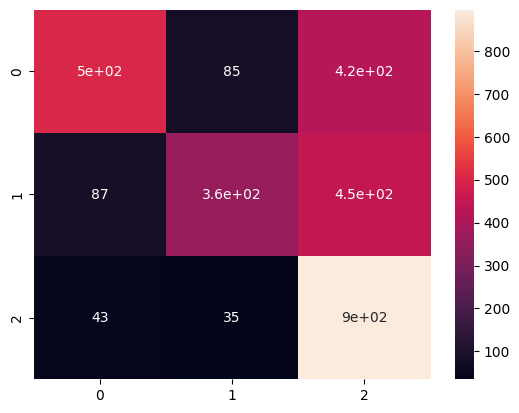

In [ ]:
sns.heatmap(SVD_matrix, annot=True)

In [ ]:
SVD_class_accuracies

array([0.4960396 , 0.40134529, 0.91991786])

## Kernel SVMs

### RBF Kernel

The RBF kernel was chosen for its high robustness for detecting the non-linear relationshisp between the feature vectors and the response digit classifications. Although computationally more complex than some kernels, its robustness is worthwhile.

In [ ]:
clf = SVC(kernel='rbf', max_iter=100)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.1, 1, 10, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(max_iter=100), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
print(f"Best C Value: {best_C}")
print(f"Best Gamma Value: {best_gamma}")

Best C Value: 1
Best Gamma Value: 0.1


In [ ]:
final_clf = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
final_clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred = final_clf.predict(X_test)

In [ ]:
RBF_matrix = confusion_matrix(y_test, y_pred)
RBF_class_accuracies = confusion_matrix(y_test, y_pred, normalize ="true").diagonal()

In [ ]:
RBF_matrix

In [ ]:
sns.heatmap(RBF_matrix, annot=True)

In [ ]:
RBF_class_accuracies

### Polynomial Kernel

The polynomial kernel was chosen as a computationally less intensive non-linear alternative. Furthermore, we can control the complexity with the polynomial to create more smooth decsion boundaries if neede.

In [ ]:
clf = SVC(kernel='poly', max_iter=100)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', max_iter=100), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'degree': [2, 3, 4, 5]},
             scoring='accuracy')

In [ ]:
best_C = grid_search.best_params_['C']
best_degree = grid_search.best_params_['degree']
print(f"Best C Value: {best_C}")
print(f"Best degree Value: {best_degree}")

Best C Value: 10
Best degree Value: 3


In [ ]:
final_clf = SVC(kernel='poly', C=best_C, degree=best_degree)
final_clf.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [ ]:
y_pred = final_clf.predict(X_test)

In [ ]:
Poly_matrix = confusion_matrix(y_test, y_pred)
Poly_class_accuracies = confusion_matrix(y_test, y_pred, normalize ="true").diagonal()

In [ ]:
Poly_matrix

array([[995,   8,   7],
       [ 12, 876,   4],
       [  7,   5, 962]])

<Axes: >

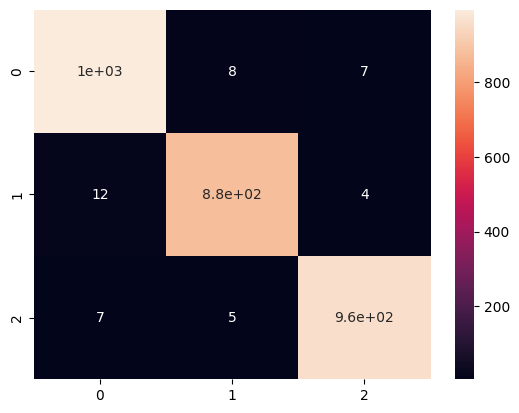

In [ ]:
sns.heatmap(Poly_matrix, annot=True)

In [ ]:
Poly_class_accuracies

array([0.98514851, 0.98206278, 0.98767967])

In [ ]:
total_class_accuracies = np.array([[0.94059406, 0.91816143, 0.94558522],
                          [0.9029703 , 0.75784753, 0.8963039 ],
                          [0.92673267, 0.92040359, 0.9137577 ],
                          [0.4960396 , 0.40134529, 0.91991786],
                          [0.97821782, 0.96412556, 0.98562628],
                          [0.98514851, 0.98206278, 0.98767967]])

In [ ]:
classes = ("Multinomial", "Naive Bayes", "LDA", "Linear SVM", "RBF Kernel","Poly. Kernel")
class_accuracies = {
    '3': tuple(np.round(total_class_accuracies[:,0],3)),
    '5': tuple(np.round(total_class_accuracies[:,1],3)),
    '8': tuple(np.round(total_class_accuracies[:,2],3))
}

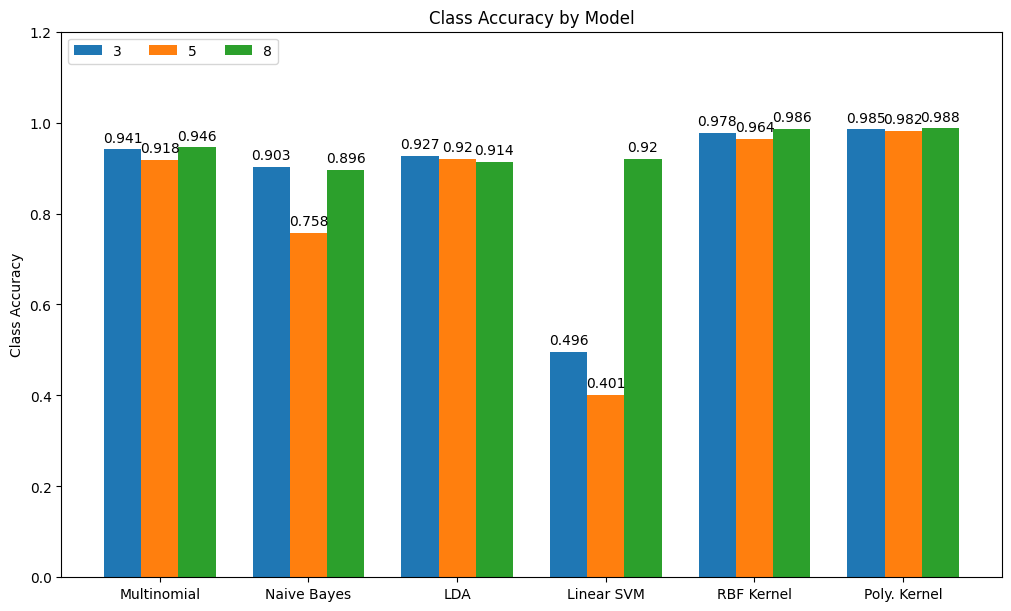

In [ ]:
x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig_width = 10
fig_height = 6

fig, ax = pyplot.subplots(layout='constrained', figsize=(fig_width, fig_height))

for attribute, measurement in class_accuracies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Class Accuracy')
ax.set_title('Class Accuracy by Model')
ax.set_xticks(x + width, classes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

pyplot.show()

The best model in terms of test accuracy (when all models are restricted to a maximum number of iterations of 100) is the Polynomial Kernel SVM. This can be explained with how polynomial kernels very easily model non-linear relationships and perform particularly well when there is a relationship between features. Since our dataset is looking at handwritten digits, it would make sense that certain features would tend to be closer to each other than others, given how penstrokes for writing numbers work. Generally, the hardest digit to classify was the number 5, since it can appear close to both 3 and 8 while 3 and 8 are slightly more distinct from each other. The Linear SVM performed particularly bad for the digits 3 and 5. This could be due to how LDA prioritizes maximizing the between class spread and minimizing the within class spread. With our features, it seems that classification techniques that have penalties or regularization techniques perform better since overfitting for digits like 3, 5, and 8 can be detreimental for generalization.